In [1]:
# Import Dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/attacks.csv'

In [3]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [4]:
shark_df.shape

(6302, 24)

In [5]:
#View Sample
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [6]:
# Removes two unneccessary columns
del shark_df['Unnamed: 22']
del shark_df['Unnamed: 23']
del shark_df['Case Number']
del shark_df['Investigator or Source']
del shark_df['href formula']
del shark_df['href']
del shark_df['Case Number.1']
del shark_df['Case Number.2']
del shark_df['original order']
del shark_df['pdf']
del shark_df['Name']

In [7]:
# Update columns that have extra spaces
shark_df = shark_df.rename(columns={"Sex ": "Sex", "Species ": "Species"})

In [8]:
# Update blank cells in columns to "Unknown" instead of dropping those rows
shark_df['Species'] = shark_df['Species'].replace({np.nan: 'Non-Disclosed'})
shark_df["Sex"] = shark_df["Sex"].replace({np.nan: "Non-Disclosed"})

In [9]:
# Standard values in column "Fatal (Y/N)"
shark_df["Fatal (Y/N)"] = shark_df["Fatal (Y/N)"].replace({np.nan: "Uncomfirmed", "UNKNOWN": "Uncomfirmed", " N": "N", 
                                                           "2017": "Uncomfirmed", "M": "Uncomfirmed", "N ": "N", "y": "Y"})

# Need to finish Data Cleanup for Activity

In [10]:
# Need to standardize list of activities to fix spelling errors and group similar activities
activities = shark_df["Activity"].unique()
for activity in activities:
    print(activity)

Paddling
Standing
Surfing
Free diving
Kite surfing
Swimming
Fishing
Walking
Feeding sharks
Boogie boarding
Scuba diving
Paddle-skiing
Body boarding
Windsurfing
Stand-Up Paddleboarding
Wading
Scuba Diving
Kayak fishing for sharks
Cleaning fish
Snorkeling
Spearfishing
nan
Diving
Fishing / Wading
2 boats capsized
Night bathing
Surfing 
Kayaking / Fishing
Kayaking
Body surfing
Swimming, poaching abalone
Canoeing
SUP
Skimboarding
Touching a shark
Fishing 
Attempting to lasso a shark
Photo shoot
Paddle boarding
Kakaying
Washing hands
Grabbing shark for a selfie
Kayak fishing
Tagging sharks
Surf skiing 
Surf fishing
Floating
Cage Diving
Surfng
SUP Foil boarding
Lobstering
Fishing in Alabama Deep Fishing Rodeo
Fishing for squid
Fishing for sharks
Floating in tube
Teasing a shark
Surf-skiing
Diving for beche-de-mer
Feeding stingrays?
Kayak Fishing
Sea disaster
Lobster fishing
Swimming / Wading
Fishing for shrimp
Photographing fish
Scallop diving on hookah
Treading water
Body boarding 
Playing i

# Need to finish Data Cleanup for Species

In [11]:
# Need to standardize list of species to remove sizes and non-species to 'Non-Disclosed'
sharks = shark_df["Species"].unique()
for shark in sharks:
    print(shark)

White shark
Non-Disclosed
2 m shark
Tiger shark, 3m
Tiger shark
Lemon shark, 3'
Bull shark, 6'
Grey reef shark
Invalid incident
Tawny nurse shark, 2m
Shark involvement not confirmed
Questionable
3 m shark
White shark, 3.5 m
White shark, 2.5 m
6' shark
Juvenile bull shark
Bull shark
Tiger shark, 12'
Wobbegong shark
3.5 m shark
1.8 m shark
Blacktip shark
Juvenile white shark,  2.7 to 3.2 m
Bull shark, 2 m
Possibly a wobbegong
Injury believed caused by an eel, not a shark
Galapagos shark?
2m shark
Bull shark, 3 m 
Grey reef shark. 2 m
small shark
Wobbegong shark?
Juvenile nurse shark
Nurse shark. 5'
Tiger shark, female
Some drowned but other may have been killed by blue sharks
White shark, 4.6 m
Cookiecutter shark
Wobbegong shark, 1 m
White shark, 4.5 m
Spinner shark, 4 to 5 feet
Tiger shark, 8 to 10 feet
8' shark
Death may have been due to drowning
5' shark
4' to 5' shark
Porbeagle, 1.5 m
White shark, 3.5m
5' to 6' shark
White shark, 3 to 3.5m 
Nurse shark
White shark, 3 m
Shark involvem

Lemon shark, 1.8 m to 2.4 m [6' to 8'], tooth fragment recovered
1.6 m shark
Tooth fragment of a white shark recovered. Authorities believed shark was 6 m [20']  total length
1.2 m [4'] dusky shark
>1 m shark
>2.4 m [8'] white shark
Raggedtooth shark, 2 m [6.75'] 
Bronze whaler shark, 3.5 m 
5.2 to 5.8 m white shark
2 m to 2.5 m [6.75'  to 8.25'] sixgill or sevengill shark
Thought to involve a Tiger shark,  3.7 m [12'] 
6', 100-lb shark
1.8 m silky shark
Possibly a small hammerhead shark
Tiger shark, 2.4 m to 2.7 m [8' to 9'] 
3 m to 3.6 m  [10' to 11'9"] white shark
30-kg [66-lb] shark
3.5 m white shark, tooth fragments recovered
1.5 m [5'] dusky shark
Shark involvement not confirmed; officials considered barracua
Hammerhead shark?+O2356
small blue shark
4.5 m to 5 m white shark
4.5 m to 5.5m white shark
Raggedtooth shark 
2.4 m [8'] white shark
1.2 m to 1.5 m [4' to 5'] hammerhead shark
2.5 m [8.25'] shark
Raggedtooth shark, 56-kg [123-lb] 
 1.5 m [5'] dusky shark
1.5 m white-tipped 

# Need to finish Data Cleanup for Date

In [12]:
shark_df['Date'].value_counts() 

1957                    11
1942                     9
1956                     8
1941                     7
1958                     7
1950                     7
No date                  6
1949                     6
1955                     5
1954                     5
1940                     5
1970s                    5
No date, Before 1963     5
1959                     5
12-Apr-01                5
28-Jul-95                5
Aug-56                   5
Oct-60                   5
5-Oct-03                 5
14-Jun-12                4
28-Dec-14                4
1960s                    4
Reported 10-Oct-1906     4
1960                     4
9-Jul-94                 4
27-Dec-08                4
20-Sep-15                4
9-Jan-10                 4
1904                     4
27-Jul-52                4
                        ..
13-Oct-15                1
Reported 09-May 1927     1
13-Aug-66                1
8-Dec                    1
Reported 02-Jan-1961     1
17-Nov-1878              1
1

# Year

In [13]:
shark_df['Year'] = shark_df['Year'].fillna(0)
shark_df['Year'] = shark_df['Year'].astype(int)
#extract the rows which the year is greater than 0
shark_df_year=shark_df[shark_df['Year']>500]

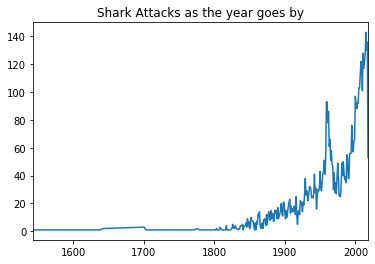

In [14]:
Years_values = shark_df_year['Year'].value_counts().sort_index()
Years_values.plot(title="Shark Attacks as the year goes by")
plt.show()

# Need to finish Data Cleanup for Type

In [15]:
shark_df.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [16]:
shark_df["Type"] = shark_df["Type"].replace({"Boat": "Boating"})
shark_df["Type"] = shark_df["Type"].replace({"Boatomg": "Boating"})

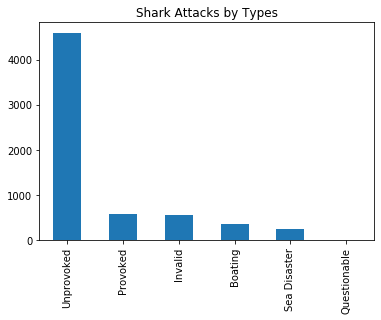

In [17]:
type_value=shark_df.Type.value_counts()
type_value.plot(kind="bar",title="Shark Attacks by Types")
plt.show()

# Need to finish Data Cleanup for Country, Area, Location

In [18]:
# Tim will take the location columns and work towards coordinates
countries = shark_df["Country"].unique()
for country in countries:
    print(country)

USA
AUSTRALIA
MEXICO
BRAZIL
ENGLAND
SOUTH AFRICA
THAILAND
COSTA RICA
MALDIVES
BAHAMAS
NEW CALEDONIA
ECUADOR
MALAYSIA
LIBYA
nan
CUBA
MAURITIUS
NEW ZEALAND
SPAIN
SAMOA
SOLOMON ISLANDS
JAPAN
EGYPT
ST HELENA, British overseas territory
COMOROS
REUNION
FRENCH POLYNESIA
UNITED KINGDOM
UNITED ARAB EMIRATES
PHILIPPINES
INDONESIA
CHINA
COLUMBIA
CAPE VERDE
Fiji
DOMINICAN REPUBLIC
CAYMAN ISLANDS
ARUBA
MOZAMBIQUE
FIJI
PUERTO RICO
ITALY
ATLANTIC OCEAN
GREECE
ST. MARTIN
FRANCE
PAPUA NEW GUINEA
TRINIDAD & TOBAGO
KIRIBATI
ISRAEL
DIEGO GARCIA
TAIWAN
JAMAICA
PALESTINIAN TERRITORIES
GUAM
SEYCHELLES
BELIZE
NIGERIA
TONGA
SCOTLAND
CANADA
CROATIA
SAUDI ARABIA
CHILE
ANTIGUA
KENYA
RUSSIA
TURKS & CAICOS
UNITED ARAB EMIRATES (UAE)
AZORES
SOUTH KOREA
MALTA
VIETNAM
MADAGASCAR
PANAMA
SOMALIA
NEVIS
BRITISH VIRGIN ISLANDS
NORWAY
SENEGAL
YEMEN
GULF OF ADEN
Sierra Leone
ST. MAARTIN
GRAND CAYMAN
Seychelles
LIBERIA
VANUATU
MEXICO 
HONDURAS
VENEZUELA
SRI LANKA
 TONGA
URUGUAY
INDIA
MICRONESIA
CARIBBEAN SEA
OKINAWA
TANZANIA

# Need to finish Data Cleanup for Time

In [19]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [20]:
shark_df.Time.value_counts()

Afternoon                        187
11h00                            128
Morning                          121
12h00                            109
15h00                            108
16h00                            101
14h00                             97
16h30                             74
17h00                             73
14h30                             73
13h00                             72
17h30                             70
18h00                             69
15h30                             66
Night                             62
11h30                             61
13h30                             60
10h00                             59
09h00                             50
10h30                             49
12h30                             36
09h30                             35
Late afternoon                    35
Evening                           34
07h30                             33
18h30                             32
08h00                             31
0

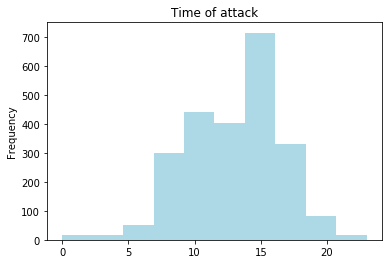

In [21]:
shark_df['Time'] = shark_df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
shark_df_time = shark_df[shark_df['Time']<25]['Time']
shark_df_time.plot(kind='hist', color='lightblue', title= "Time of attack")
plt.show()